In [46]:
from hydra import initialize, compose
import pandas as pd
from tools.display_tools import simple_sample_display
from tools.tools import make_human_readable, summary_transform, max_accuracy

In [5]:
from methods.varlingam import varlingam_baseline

In [25]:
with initialize(version_base=None, config_path="config/"):
    cfg = compose(config_name='benchmark.yaml', overrides=["method=varlingam"])

In [29]:
X = pd.read_csv(cfg.data_path+ cfg.ds_name + "0_data.csv", index_col=0)
Y = pd.read_csv(cfg.data_path+ cfg.ds_name + "0_label.csv", index_col=0)

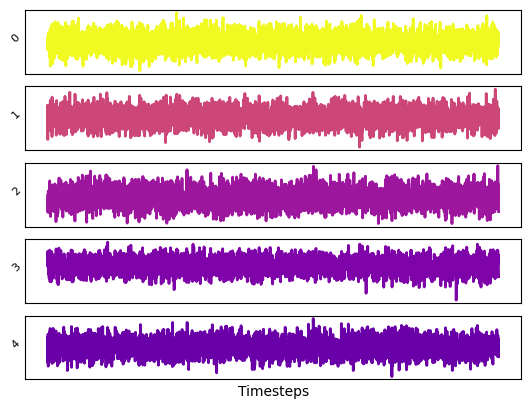

In [43]:
simple_sample_display(X)

In [51]:
preds = summary_transform(varlingam_baseline(X, cfg.method),cfg)
make_human_readable(preds, Y)

Cause                                        
                 0         1         2         3         4
Effect 0  0.000000  0.043326  0.000000  0.000000  0.000000
       1  0.317849  0.000000  0.000000  0.000000  0.000000
       2  0.000000  0.000000  0.000000  0.399866  0.000000
       3  0.316052  0.000000  0.000000  0.000000  0.438533
       4  0.000000  0.000000  0.370682  0.000000  0.000000

In [52]:
Y

,0,1,2,3,4
Effect,,,,,
0,False,False,False,False,False
1,True,False,False,False,False
2,False,False,False,True,False
3,True,False,False,False,True
4,False,False,True,False,False


In [55]:
max_accuracy(Y.values, preds)

(0.04385332898655211, 1.0)